# Module-3
## Sentiment analysis of flipkart reviews using NLTK  

In [8]:
import pandas as pd
df = pd.read_csv("laptop_reviews.csv")
df["is_bad_review"] = df["rating"].apply(lambda x: 1 if x < 4 else 0)
df = df[["name","heading_cmt","review","rating", "is_bad_review"]]
df

,name,heading_cmt,review,rating,is_bad_review
0,Abhinaw Prasad,Brilliant,Processor - Just Go for it Ryzen7 4800H is jus...,5.0,0
1,Flipkart Customer,Great product,Initial thoughts :*The system is smooth and st...,5.0,0
2,AADITH SUNIL,Mind-blowing purchase,I got this product for 68k for that price its ...,5.0,0
3,Himanshu Kumar,Wonderful,You can't ask for more from this....this is my...,5.0,0
4,Bishwash Joshi,Worth every penny,In this price range you will get many laptops ...,5.0,0
...,...,...,...,...,...
440,Lester Fernandes,Fair,Is good for office workREAD MORE,3.0,1
441,Ashish,Worth the money,"Neither good nor bad, the processing is slow i...",4.0,0
442,BIPINLAL K B,Must buy!,Very Good Laptop..Thanks FlipkartREAD MORE,5.0,0
443,Fayaz Shaik,Good choice,"Good Product and Performance , But Sometimes i...",4.0,0


## Cleaning and analysing the review

In [9]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["review_clean"] = df["review"].apply(lambda x: clean_text(x))

In [10]:
df

,name,heading_cmt,review,rating,is_bad_review,review_clean
0,Abhinaw Prasad,Brilliant,Processor - Just Go for it Ryzen7 4800H is jus...,5.0,0,processor go wow.gpu enough play late game mid...
1,Flipkart Customer,Great product,Initial thoughts :*The system is smooth and st...,5.0,0,initial thought system smooth steady colour ac...
2,AADITH SUNIL,Mind-blowing purchase,I got this product for 68k for that price its ...,5.0,0,get product price great one even though webcam...
3,Himanshu Kumar,Wonderful,You can't ask for more from this....this is my...,5.0,0,can't ask this....this first laptop best lapto...
4,Bishwash Joshi,Worth every penny,In this price range you will get many laptops ...,5.0,0,price range get many laptop best ssd come gb r...
...,...,...,...,...,...,...
440,Lester Fernandes,Fair,Is good for office workREAD MORE,3.0,1,good office workread
441,Ashish,Worth the money,"Neither good nor bad, the processing is slow i...",4.0,0,neither good bad process slow value money prod...
442,BIPINLAL K B,Must buy!,Very Good Laptop..Thanks FlipkartREAD MORE,5.0,0,good laptop..thanks flipkartread
443,Fayaz Shaik,Good choice,"Good Product and Performance , But Sometimes i...",4.0,0,good product performance sometimes get lag kno...


# word cloud

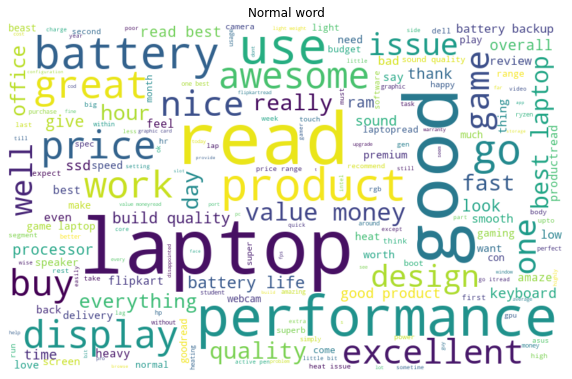

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

normal_words1 =' '.join([text for text in df['review_clean']])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Normal word')
plt.show()

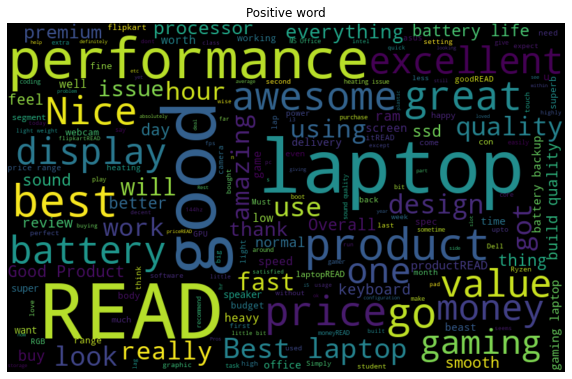

In [12]:

normal_words =' '.join([text for text in df['review'][df['is_bad_review'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive word')
plt.show()

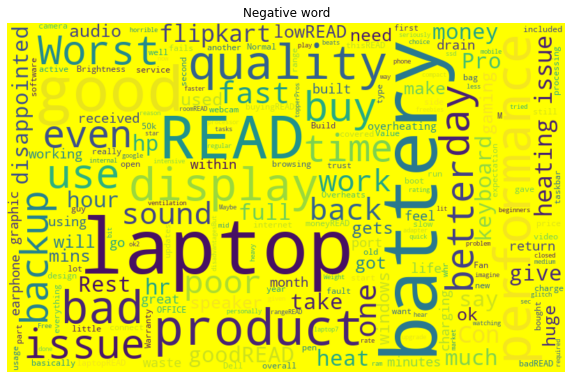

In [13]:
normal_words1 =' '.join([text for text in df['review'][df['is_bad_review'] == 1]])

wordcloud = WordCloud(background_color = 'yellow',width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative word')
plt.show()

# analysis features 

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["review"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [15]:
df

,name,heading_cmt,review,rating,is_bad_review,review_clean,neg,neu,pos,compound
0,Abhinaw Prasad,Brilliant,Processor - Just Go for it Ryzen7 4800H is jus...,5.0,0,processor go wow.gpu enough play late game mid...,0.000,0.805,0.195,0.9493
1,Flipkart Customer,Great product,Initial thoughts :*The system is smooth and st...,5.0,0,initial thought system smooth steady colour ac...,0.038,0.762,0.200,0.9072
2,AADITH SUNIL,Mind-blowing purchase,I got this product for 68k for that price its ...,5.0,0,get product price great one even though webcam...,0.025,0.784,0.190,0.9539
3,Himanshu Kumar,Wonderful,You can't ask for more from this....this is my...,5.0,0,can't ask this....this first laptop best lapto...,0.000,0.788,0.212,0.7906
4,Bishwash Joshi,Worth every penny,In this price range you will get many laptops ...,5.0,0,price range get many laptop best ssd come gb r...,0.000,0.710,0.290,0.9888
...,...,...,...,...,...,...,...,...,...,...
440,Lester Fernandes,Fair,Is good for office workREAD MORE,3.0,1,good office workread,0.000,0.633,0.367,0.4404
441,Ashish,Worth the money,"Neither good nor bad, the processing is slow i...",4.0,0,neither good bad process slow value money prod...,0.362,0.638,0.000,-0.7014
442,BIPINLAL K B,Must buy!,Very Good Laptop..Thanks FlipkartREAD MORE,5.0,0,good laptop..thanks flipkartread,0.000,0.556,0.444,0.4927
443,Fayaz Shaik,Good choice,"Good Product and Performance , But Sometimes i...",4.0,0,good product performance sometimes get lag kno...,0.084,0.676,0.241,0.7003


In [16]:
df["nb_chars"] = df["review"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["review"].apply(lambda x: len(x.split(" ")))

In [17]:
df

,name,heading_cmt,review,rating,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,Abhinaw Prasad,Brilliant,Processor - Just Go for it Ryzen7 4800H is jus...,5.0,0,processor go wow.gpu enough play late game mid...,0.000,0.805,0.195,0.9493,498,95
1,Flipkart Customer,Great product,Initial thoughts :*The system is smooth and st...,5.0,0,initial thought system smooth steady colour ac...,0.038,0.762,0.200,0.9072,361,67
2,AADITH SUNIL,Mind-blowing purchase,I got this product for 68k for that price its ...,5.0,0,get product price great one even though webcam...,0.025,0.784,0.190,0.9539,509,103
3,Himanshu Kumar,Wonderful,You can't ask for more from this....this is my...,5.0,0,can't ask this....this first laptop best lapto...,0.000,0.788,0.212,0.7906,151,28
4,Bishwash Joshi,Worth every penny,In this price range you will get many laptops ...,5.0,0,price range get many laptop best ssd come gb r...,0.000,0.710,0.290,0.9888,496,97
...,...,...,...,...,...,...,...,...,...,...,...,...
440,Lester Fernandes,Fair,Is good for office workREAD MORE,3.0,1,good office workread,0.000,0.633,0.367,0.4404,32,6
441,Ashish,Worth the money,"Neither good nor bad, the processing is slow i...",4.0,0,neither good bad process slow value money prod...,0.362,0.638,0.000,-0.7014,88,16
442,BIPINLAL K B,Must buy!,Very Good Laptop..Thanks FlipkartREAD MORE,5.0,0,good laptop..thanks flipkartread,0.000,0.556,0.444,0.4927,42,5
443,Fayaz Shaik,Good choice,"Good Product and Performance , But Sometimes i...",4.0,0,good product performance sometimes get lag kno...,0.084,0.676,0.241,0.7003,188,31


# count review

<AxesSubplot:>

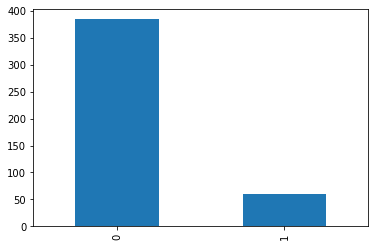

In [18]:
df["is_bad_review"].value_counts().plot(kind='bar')

In [19]:
df["is_bad_review"].value_counts(normalize = True)

0    0.862921
1    0.137079
Name: is_bad_review, dtype: float64

# sort negative & positive review

In [20]:
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["heading_cmt","review_clean", "pos"]].head(10)

,heading_cmt,review_clean,pos
255,Fabulous!,excellent 👌☺️ super performanceread,0.717
425,Worth every penny,best laptop world thanks,0.703
40,Super!,good laptop best designread,0.703
429,Fabulous!,value money amaze product,0.674
266,Good choice,wonderful item love ❤️❤️read,0.655
72,Worth every penny,nice one best classread,0.636
375,Just wow!,performance excellentoverall super product bes...,0.618
351,Classy product,"excellent performance love use ssd.,read",0.612
418,Terrific,nice laptop happy thank flipkartread,0.608
413,Terrific,nice laptop happy thank flipkartread,0.608


In [21]:
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["heading_cmt","review_clean", "neg"]].head(10)

,heading_cmt,review_clean,neg
160,Not recommended at all,bad product get fault day buyingread,0.430
175,Not recommended at all,bad product get fault day buyingread,0.430
427,Average product,display terrible expect bad battery also great...,0.392
441,Worth the money,neither good bad process slow value money prod...,0.362
98,Decent product,internal camera audio horrible even hear close...,0.322
33,Pretty good,review weeksgood laptop multitasking.battery e...,0.316
199,Nice,well okeyread,0.312
231,Great product,sound quality bad camera also 👎read,0.296
207,Does the job,battery life low build hard gamingread,0.259
284,Nice,soo bad within week fingerprint work bad seeee...,0.257


## Visualizing good and bad review

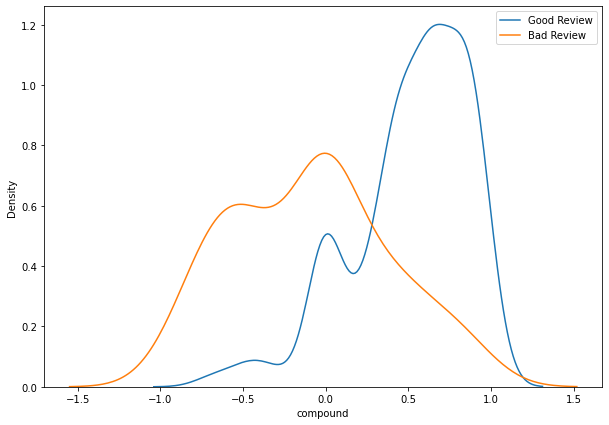

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
plt.figure(figsize=(10, 7))
for x in [0, 1]:
    subset = df[df['is_bad_review'] == x]
    
    
    sns.distplot(subset['compound'], hist = False)
plt.legend(['Good Review','Bad Review'])

## Preparing data for testing and training

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['review_clean'])

In [24]:
#bow[0].toarray()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['is_bad_review'], random_state=42, test_size=0.25)

## Applying logistic regression for sentiment prediction

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
pred = model.predict(x_test)
print(f1_score(y_test, pred))



0.39999999999999997


In [31]:
accuracy_score(y_test,pred)

0.8660714285714286

In [28]:
import numpy as np
test_data=y_test.to_numpy()
test_data

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [29]:
df1 = pd.DataFrame(data = test_data,columns = ['testing_data'])
df2 = pd.DataFrame(data = pred,columns = ['predicted'])
final_result=df1.join(df)
final_result

,testing_data,name,heading_cmt,review,rating,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,1,Abhinaw Prasad,Brilliant,Processor - Just Go for it Ryzen7 4800H is jus...,5.0,0,processor go wow.gpu enough play late game mid...,0.000,0.805,0.195,0.9493,498,95
1,0,Flipkart Customer,Great product,Initial thoughts :*The system is smooth and st...,5.0,0,initial thought system smooth steady colour ac...,0.038,0.762,0.200,0.9072,361,67
2,0,AADITH SUNIL,Mind-blowing purchase,I got this product for 68k for that price its ...,5.0,0,get product price great one even though webcam...,0.025,0.784,0.190,0.9539,509,103
3,0,Himanshu Kumar,Wonderful,You can't ask for more from this....this is my...,5.0,0,can't ask this....this first laptop best lapto...,0.000,0.788,0.212,0.7906,151,28
4,0,Bishwash Joshi,Worth every penny,In this price range you will get many laptops ...,5.0,0,price range get many laptop best ssd come gb r...,0.000,0.710,0.290,0.9888,496,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,Ashish Mathan,Worth every penny,Very good product for the price point of view ...,5.0,0,good product price point view ❤️read,0.000,0.758,0.242,0.4927,57,11
108,0,Raj Gor,Must buy!,Definitely one of the best laptop available at...,5.0,0,definitely one best laptop available price ran...,0.000,0.670,0.330,0.7845,99,16
109,0,Rajeev,Worth every penny,"Everything is awesomeDisplay is nice but, as i...",5.0,0,everything awesomedisplay nice ip display scre...,0.000,0.767,0.233,0.8922,238,41
110,0,SANNID O,Just wow!,"Good Product, I am satisfied all of the featur...",5.0,0,good product satisfy feature except battery li...,0.000,0.642,0.358,0.9158,172,29
